Now that you can create your own line charts, it's time to learn about more chart types!  

> By the way, if this is your first experience with writing code in Python, you should be _very proud_ of all that you have accomplished so far, because it's never easy to learn a completely new skill!  If you stick with the micro-course, you'll notice that everything will only get easier (while the charts you'll build will get more impressive!), since the code is pretty similar for all of the charts.  Like any skill, coding becomes natural over time, and with repetition.

In this tutorial, you'll learn about **bar charts** and **heatmaps**.

# Set up the notebook

As always, we begin by setting up the coding environment.  (_This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right._)

In [7]:
import lux
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


# Select a dataset

In this tutorial, we'll work with a dataset from the US Department of Transportation that tracks flight delays.

Opening this CSV file in Excel shows a row for each month (where `1` = January, `2` = February, etc) and a column for each airline code.

![tut2_flight_delay_head](https://i.imgur.com/5nYs9se.png)

Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015).  Negative entries denote flights that (_on average_) tended to arrive early.  For instance, the average American Airlines flight (_airline code: **AA**_) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (_airline code: **AS**_) in April arrived roughly 3 minutes early.

# Load the data

As before, we load the dataset using the `pd.read_csv` command.

In [8]:
# Path of the file to read
flight_filepath = "D:\Jupyter Notebooks\Dataset/flight_delays.csv"

# Read the file into a variable flight_data
#flight_data = pd.read_csv(flight_filepath, index_col="Month")

flight_data = pd.read_csv(flight_filepath)

You may notice that the code is slightly shorter than what we used in the previous tutorial.  In this case, since the row labels (from the `'Month'` column) don't correspond to dates, we don't add `parse_dates=True` in the parentheses.  But, we keep the first two pieces of text as before, to provide both: 
- the filepath for the dataset (in this case, `flight_filepath`), and 
- the name of the column that will be used to index the rows (in this case, `index_col="Month"`). 

# Examine the data

Since the dataset is small, we can easily print all of its contents.  This is done by writing a single line of code with just the name of the dataset.

In [9]:
# Print the data
flight_data

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


# Bar chart

Say we'd like to create a bar chart showing the average arrival delay for Spirit Airlines (_airline code: **NK**_) flights, by month.  

Text(0, 0.5, 'Arrival delay (in minutes)')

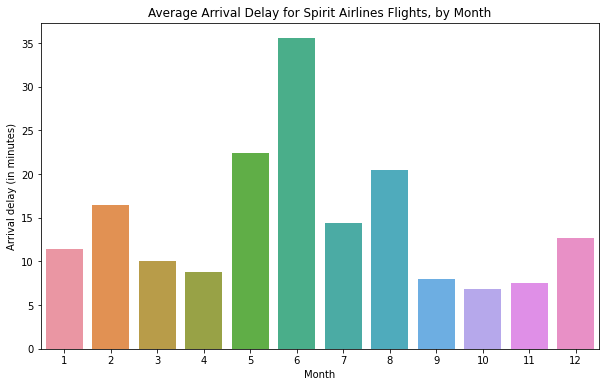

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
# sns.barplot(x=flight_data.index, y=flight_data['NK'])

sns.barplot(x=flight_data["Month"], y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

# plt.xlabel("Month")

The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous tutorial.  The code that creates the bar chart is new:

```python
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])
```
It has three main components:
- `sns.barplot` - This tells the notebook that we want to create a bar chart.
 - _Remember that `sns` refers to the [seaborn](https://seaborn.pydata.org/) package, and all of the commands that you use to create charts in this course will start with this prefix._
- `x=flight_data.index` - This determines what to use on the horizontal axis.  In this case, we have selected the column that **_index_**es the rows (in this case, the column containing the months).
- `y=flight_data['NK']` - This sets the column in the data that will be used to determine the height of each bar.  In this case, we select the `'NK'` column.

> **Important Note**: You must select the indexing column with `flight_data.index`, and it is not possible to use `flight_data['Month']` (_which will return an error_).  This is because when we loaded the dataset, the `"Month"` column was used to index the rows.  **We always have to use this special notation to select the indexing column.**

# Heatmap

We have one more plot type to learn about: **heatmaps**! 

In the code cell below, we create a heatmap to quickly visualize patterns in `flight_data`.  Each cell is color-coded according to its corresponding value.

Text(105.0, 0.5, 'Month')

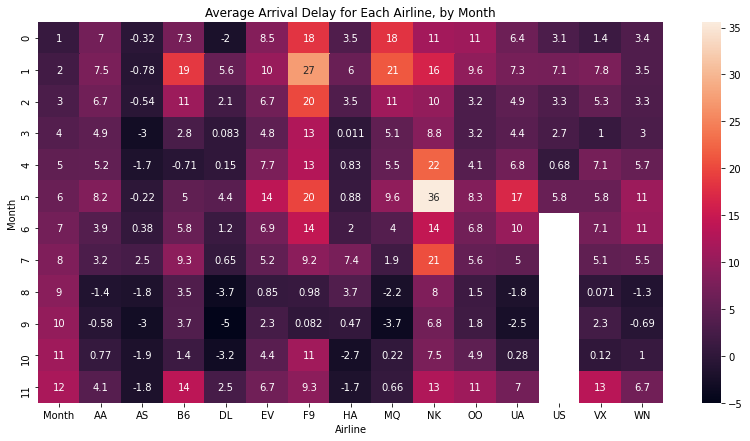

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

# Add Label for vertical axis
plt.ylabel("Month")

The relevant code to create the heatmap is as follows:
```python
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)
```
This code has three main components:
- `sns.heatmap` - This tells the notebook that we want to create a heatmap.
- `data=flight_data` - This tells the notebook to use all of the entries in `flight_data` to create the heatmap.
- `annot=True` - This ensures that the values for each cell appear on the chart.  (_Leaving this out removes the numbers from each of the cells!_)

_What patterns can you detect in the table?  For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines.  This suggests that airlines are better (on average) at keeping schedule during these months!_  

# What's next?

Create your own visualizations with a **[coding exercise](https://www.kaggle.com/kernels/fork/2951537)**!

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161291) to chat with other Learners.*